In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import unravel_index

In [2]:
###To keep from calling plt.show every time
%matplotlib inline

In [3]:
napster_df = pd.read_csv("../Data/MLC_Data.csv", nrows=100001)

In [4]:
#example of read specifying select columns
#df = pd.read_csv('courses.csv', usecols =['Courses','Fee','Discount'])

In [5]:
#example for specifying column datatype
#df = pd.read_csv('courses.csv', dtype={'Courses':'string','Fee':'float'})

In [6]:
napster_df.shape

(100000, 13)

In [7]:
napster_df.head(7)

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,"8,133",x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,"5,839",Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1


In [8]:
napster_df.dtypes

If                                            object
Country Code                                  object
Registrant Code                               object
Year of Reference                            float64
Usage Period                                  object
Streaming Platform (DSP)                      object
Streams                                       object
Recording Artist                              object
Recording Label                               object
Recording Title                               object
Release Title                                 object
Recording Duration (Seconds)                   int64
Songwriter's Listed (1 = "Yes", 0 = "No")      int64
dtype: object

In [9]:
#pd.set_option('display.max_rows',n)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_rows') to reset

In [10]:
napster_df['Streams'].map(type).head()

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
4    <class 'str'>
Name: Streams, dtype: object

In [11]:
napster_df.replace(',','', regex=True, inplace=True)
#df.replace(',','', regex=True, inplace=True)

In [12]:
#Rob's code
#mlc['streams']=mlc['streams'].str.replace(',','')

In [13]:
napster_df.head()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [14]:
#napster_df['Streams'] = napster_df['Streams'].apply(pd.to_numeric,errors='coerce')
#df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [15]:
#
#df["a"] = df["a"].astype(str).astype(int)
#napster_df['Streams'] = napster_df['Streams'].astype('bytes')

In [16]:
napster_df.dtypes

If                                            object
Country Code                                  object
Registrant Code                               object
Year of Reference                            float64
Usage Period                                  object
Streaming Platform (DSP)                      object
Streams                                       object
Recording Artist                              object
Recording Label                               object
Recording Title                               object
Release Title                                 object
Recording Duration (Seconds)                   int64
Songwriter's Listed (1 = "Yes", 0 = "No")      int64
dtype: object

In [17]:
#Convert to list, then to array, before converting to numeric
#arr = np.array(allHoldingsFund['ratioBest'].tolist())
#allHoldingsFund['ratioBest'] = (pd.to_numeric(arr, errors='coerce'))
#list = napster_df['Streams'].tolist()
#arr = np.array(list)
#napster_df['Streams'] = pd.DataFrame(arr)
#napster_df['Streams'] = pd.to_numeric(arr, downcast='signed')
#napster_df['Streams'] = napster_df['Streams'].apply(int)

In [18]:
display(napster_df.loc[[5]])
#df.loc[df['column name'].isnull() == True] 

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0


In [19]:
napster_df.head(7)

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1


In [20]:
#probably the most significant piece of code on this
napster_df['Streams'] = napster_df['Streams'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [21]:
#Rob's code
#mlc['streams']=mlc['streams'].str.replace(',','')
#mlc['streams']=mlc['streams'].astype(int)

In [22]:
napster_df.dtypes

If                                            object
Country Code                                  object
Registrant Code                               object
Year of Reference                            float64
Usage Period                                  object
Streaming Platform (DSP)                      object
Streams                                        int64
Recording Artist                              object
Recording Label                               object
Recording Title                               object
Release Title                                 object
Recording Duration (Seconds)                   int64
Songwriter's Listed (1 = "Yes", 0 = "No")      int64
dtype: object

In [23]:
#napster_df['Streams'] = napster_df['Streams'].str.decode('utf-8')
#df['COLUMN1'].str.decode("utf-8")

In [24]:
napster_df.head()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [25]:
napster_df.dtypes

If                                            object
Country Code                                  object
Registrant Code                               object
Year of Reference                            float64
Usage Period                                  object
Streaming Platform (DSP)                      object
Streams                                        int64
Recording Artist                              object
Recording Label                               object
Recording Title                               object
Release Title                                 object
Recording Duration (Seconds)                   int64
Songwriter's Listed (1 = "Yes", 0 = "No")      int64
dtype: object

In [26]:
napster_df.head(7)

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1


In [27]:
napster_df.describe()

,Year of Reference,Streams,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
count,98239.000000,1.000000e+05,100000.000000,100000.000000
mean,19.671933,5.626550e+04,1016.893690,0.541610
std,12.638870,2.620276e+05,15565.692133,0.498268
min,0.000000,1.000000e+00,0.000000,0.000000
25%,17.000000,6.807000e+03,149.000000,0.000000
50%,19.000000,1.677250e+04,190.000000,1.000000
75%,20.000000,3.990300e+04,236.000000,1.000000
max,99.000000,2.145617e+07,818738.000000,1.000000


In [28]:
napster_df.columns = ['ISRC','Country_Code','Registrant_Code','Ref_Year','Usage_Period','Streaming_Plat_DSP','Streams','Recording_Artist','Recording_Label','Recording_Title','Release_Title','Recording_Dur_s','Songwriter_Y_N']

In [29]:
napster_df.head(7)

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1


In [30]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                 int64
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [31]:
# number of nan per row in napster_df
display(napster_df.isna().sum())

ISRC                  1760
Country_Code          1697
Registrant_Code       1697
Ref_Year              1761
Usage_Period          8102
Streaming_Plat_DSP    3999
Streams                  0
Recording_Artist         0
Recording_Label       1008
Recording_Title          0
Release_Title           69
Recording_Dur_s          0
Songwriter_Y_N           0
dtype: int64

(array([50258., 44877.,    96.,   760.,  2248.]),
 array([ 0. , 19.8, 39.6, 59.4, 79.2, 99. ]),
 <BarContainer object of 5 artists>)

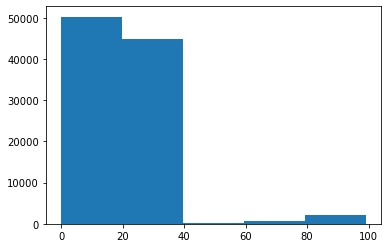

In [32]:
#Finding the songs by recording decade
plt.hist(napster_df['Ref_Year'], bins = 5)

(array([45839.,     0.,     0.,     0., 54161.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

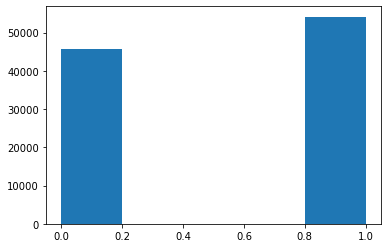

In [33]:
#Finding # Songwriter's Listed vs. Songwriter Not Listed
plt.hist(napster_df['Songwriter_Y_N'], bins = 5)

In [34]:
#Finding actual number for Songwriter Not Listed
(napster_df['Songwriter_Y_N']==0).sum()

45839

In [35]:
#Finding actual number for Songwriter Listed
(napster_df['Songwriter_Y_N']==1).sum()

54161

In [36]:
#Max Song duration in napster_df
napster_df['Recording_Dur_s'].max()

818738

In [37]:
#Min Song duration in napster_df
napster_df['Recording_Dur_s'].min()

0

In [38]:
#group into Songwriter_Y_N into Not Listed 0 and  Listed 1

In [39]:
sw_y_n_0 = napster_df[napster_df['Songwriter_Y_N']==0]
#sw_y_n_0.head(5)

In [40]:
sw_y_n_1 = napster_df[napster_df['Songwriter_Y_N']==1]
#sw_y_n_1.head(5)

In [41]:
#df.groupby('team').size().reset_index(name='obs')

In [42]:
#adding counts of 0 countries; i.e. countries that have the most Songwriters Not Listed
country_code_0_grp = sw_y_n_0.groupby(['Country_Code'])['Songwriter_Y_N'].count().reset_index(name='zero_count').sort_values(by='zero_count', ascending=False)
country_code_0_grp.head(10)

,Country_Code,zero_count
64,US,18853
58,QZ,7869
57,QM,3901
61,TC,3841
29,GB,3083
60,SE,1127
21,DE,1087
12,CA,655
28,FR,598
42,JP,587


In [43]:
#adding counts of 1 countries, i.e. Most Countries for Songwriters Listed
country_code_1_grp = sw_y_n_1.groupby(['Country_Code'])['Songwriter_Y_N'].count().reset_index(name='one_count').sort_values(by='one_count', ascending=False)
country_code_1_grp.head(10)
#notice reset_index to create a dataframe rather than a series!!

,Country_Code,one_count
65,US,22768
59,QZ,9320
58,QM,4508
62,TC,4454
29,GB,3528
61,SE,1434
21,DE,1192
13,CA,776
42,JP,701
27,FR,665


In [44]:
#sample code for extracting column to add to another - - extracted_col = df1["Col3"]

In [45]:
#sample code for inserting an extracted file - - df2.insert(1, "C3", extracted_col)

In [46]:
#extract column needed in order to add to the other
extracted_col = country_code_1_grp['one_count']

In [47]:
country_code_0_grp.head()

,Country_Code,zero_count
64,US,18853
58,QZ,7869
57,QM,3901
61,TC,3841
29,GB,3083


In [48]:
#Creating combined Country - Songwriter List and No list numbers
#add one_count column to zero_count column to form combined db
country_code_grp = country_code_0_grp
country_code_grp.insert(2,'one_count',extracted_col)
country_code_grp.sort_values(by='zero_count', ascending=False)
country_code_grp.head(10)

,Country_Code,zero_count,one_count
64,US,18853,459
58,QZ,7869,4508
57,QM,3901,1
61,TC,3841,1434
29,GB,3083,3528
60,SE,1127,24
21,DE,1087,1192
12,CA,655,11
28,FR,598,1
42,JP,587,701


In [49]:
#changing names of columns
country_code_grp.columns = ['Country_Code', 'Writer_Not_Listed', 'Writer_Listed']
country_code_grp.head(10)

,Country_Code,Writer_Not_Listed,Writer_Listed
64,US,18853,459
58,QZ,7869,4508
57,QM,3901,1
61,TC,3841,1434
29,GB,3083,3528
60,SE,1127,24
21,DE,1087,1192
12,CA,655,11
28,FR,598,1
42,JP,587,701


In [50]:
#sample code -- #group by country code
#grpbycc = napster_df.groupby(['Country_Code'])

In [51]:
#sample code -- group by us
#us_grpbycc = grpbycc.get_group('US')

In [52]:
#us_grpbycc.head(10)

In [53]:
#sample code -- group subset us group into all that have songwriter status equal 0
#us_grpbycc[us_grpbycc['Songwriter_Y_N']==0]

In [54]:
#sample code - - now perform an aggregate
#us_grpbycc[us_grpbycc['Songwriter_Y_N']==0]['Songwriter_Y_N'].count

### Starting DSP Analysis

In [55]:
#Using napster_df above find top 10 clients for each DSP for all years in napster_df; looking at Streams per DSP

In [56]:
#

In [57]:
napster_df.head(7)

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1


In [58]:
#finding data types for columns
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                 int64
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [59]:
#change Streams from object to float
#napster_df['Streams'] = napster_df['Streams'].astype(str)
#napster_df['Streams'] = pd.to_numeric(napster_df['Streams'],errors = 'coerce')
#napster_df.dtypes

In [60]:
#example of changing object to string and then to a number to get working value
#df['purchase'].astype(str).astype(int)

In [61]:
napster_df.head(7)

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1


In [62]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                 int64
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [63]:
#isrc_by_dsp = napster_df.Streaming_Plat_DSP.value_counts()
#isrc_by_dsp.head(10)

In [64]:
#set display for scientific notation
#pd.reset_option('^display.', silent=True)

In [65]:
#top_streaming_DSP
dsp_by_stream = napster_df.groupby(['Streaming_Plat_DSP'])['Streams'].sum().reset_index(name='num_streams').sort_values(by='num_streams', ascending=False)
dsp_by_stream.head(10)

,Streaming_Plat_DSP,num_streams
22,Spotify,2552563722
2,Apple,1606453701
15,Pandora,874236566
21,SoundCloud,166813813
27,YouTube,158031119
0,Amazon,151199800
23,Tidal,48793126
3,AudioMack,11991559
9,Melodyv,5384657
28,iHeart Radio,2141959


In [95]:
dsp_by_stream.reset_index(drop=True)

,Streaming_Plat_DSP,num_streams
0,Spotify,2552563722
1,Apple,1606453701
2,Pandora,874236566
3,SoundCloud,166813813
4,YouTube,158031119
5,Amazon,151199800
6,Tidal,48793126
7,AudioMack,11991559
8,Melodyv,5384657
9,iHeart Radio,2141959


<AxesSubplot:>

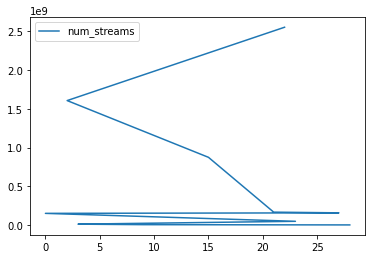

In [97]:
dsp_by_stream.iloc[0:10].plot(y='num_streams')

In [66]:
dsp_by_stream.iloc[[0]]

,Streaming_Plat_DSP,num_streams
22,Spotify,2552563722


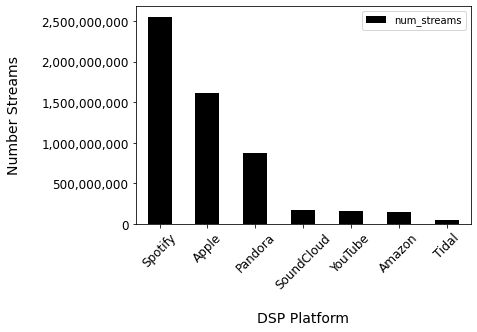

In [169]:
import matplotlib as mpl
#import matplotlib.ticker as tkr
#fig, ax = plt.subplots(1,1); dsp_by_stream.plot(ax=ax, kind = 'bar')


#def xfunc(x, pos):
#    s = '{:0,d}'.format(int(x))
 #   return s

#x_format = tkr.FuncFormatter(xfunc)
#ax.xaxis.set_major_formatter(x_format)

ax = dsp_by_stream.iloc[0:7].plot(x='Streaming_Plat_DSP',  y='num_streams', kind = 'bar', color='black', fontsize=12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#plt.ticklabel_format(useOffset=False, style='plain')
#plt.bar(dsp_by_stream.Streaming_Plat_DSP[:7], dsp_by_stream.num_streams[:7],color='black')
plt.xlabel('DSP Platform',color='black', fontsize=14, labelpad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.ylabel('Number Streams',color='black', fontsize=14, labelpad=20)
plt.xticks(rotation=45)
#plt.title('Number of Titles by Year-of-Reference Decade',color='black')
plt.savefig('decade_by_num_stream.png', dpi=100, bbox_inches='tight', transparent=False) #100 is normal-high res takes space
plt.show()

In [163]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 6432-B2DE

 Directory of C:\Users\scott\Documents\NSS-Data-Analytics\Data\mlc-project-napster\Notebooks

05/03/2022  11:21 PM    <DIR>          .
05/03/2022  11:21 PM    <DIR>          ..
04/28/2022  11:12 PM    <DIR>          .ipynb_checkpoints
05/03/2022  11:21 PM            10,519 decade_by_num_stream.png
05/03/2022  08:53 PM         3,572,950 Napster_Final.ipynb
05/03/2022  11:21 PM           215,125 Napster_Find.ipynb
05/03/2022  08:20 PM             9,647 num_titles_by_ref_decade.png
05/03/2022  09:48 PM             9,454 num_titles_by_ref_decade_70s.png
05/03/2022  08:20 PM            11,230 percent_songwriter_not_listed_by_decade.png
05/03/2022  08:20 PM            11,098 songwriter_not_listed_by_decade.png
05/03/2022  08:34 PM             7,525 songwriter_not_listed_by_decade_70s.png
04/19/2022  08:08 PM             1,735 Untitled.ipynb
04/23/2022  09:38 AM             2,777 Untitled1.ipynb
04/28/2022  11:12 PM                7

In [67]:
dsp_by_stream.reset_index(drop=True)

,Streaming_Plat_DSP,num_streams
0,Spotify,2552563722
1,Apple,1606453701
2,Pandora,874236566
3,SoundCloud,166813813
4,YouTube,158031119
5,Amazon,151199800
6,Tidal,48793126
7,AudioMack,11991559
8,Melodyv,5384657
9,iHeart Radio,2141959


In [68]:
#pd.DataFrame(dsp_by_stream.size().reset_index(name = 'Group_Count'))
#pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))

In [69]:
isrc_by_dsp = napster_df.groupby(['Streaming_Plat_DSP'])['ISRC'].count().reset_index(name='isrc_count').sort_values(by='isrc_count', ascending=False)
isrc_by_dsp.head(10)

,Streaming_Plat_DSP,isrc_count
22,Spotify,31697
2,Apple,21820
0,Amazon,14173
15,Pandora,13540
23,Tidal,3468
27,YouTube,2696
21,SoundCloud,2086
7,GTL,1064
9,Melodyv,814
24,Trebel,798


In [70]:
#finding nan in DSP column
#napster_df['Streaming_Plat_DSP'].isna().sum()

In [71]:
#finding nan in irsc column
#napster_df['ISRC'].isna().sum()

In [72]:
# number of nan per row in napster_df
display(napster_df.isna().sum())

ISRC                  1760
Country_Code          1697
Registrant_Code       1697
Ref_Year              1761
Usage_Period          8102
Streaming_Plat_DSP    3999
Streams                  0
Recording_Artist         0
Recording_Label       1008
Recording_Title          0
Release_Title           69
Recording_Dur_s          0
Songwriter_Y_N           0
dtype: int64

In [73]:
#subset for Spotify
spotify_sub = napster_df[napster_df['Streaming_Plat_DSP']=='Spotify']
spotify_sub.head(5)

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
8,USRC12100543,US,RC1,21.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1
9,USAT22007048,US,AT2,20.0,3/1/2021,Spotify,28419,2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1
11,QMCE32100237,QM,CE3,21.0,1/1/2021,Spotify,14118,Alaina Castillo,Chosen People,¡párate!,¡párate!,154,1
12,USAT22100145,US,AT2,21.0,5/1/2021,Spotify,107079,dodie,doddleoddle,?,Build A Problem,73,1


In [74]:
#spotify_sub.groupby(['Streaming_Plat_DSP'])['Ref_Year'].count().reset_index(name='isrc_count').sort_values(by='isrc_count', ascending=False)

In [75]:
spotify_yr_stream_sum = spotify_sub.groupby(['Ref_Year'])['Streams'].sum().reset_index(name='spotify_num_streams').sort_values(by='Ref_Year', ascending=True)
spotify_yr_stream_sum.head(37)

,Ref_Year,spotify_num_streams
0,0.0,3898657
1,1.0,8819809
2,2.0,8235148
3,3.0,6042872
4,4.0,18608832
5,5.0,25732031
6,6.0,10385801
7,7.0,11056939
8,8.0,14247107
9,9.0,22170310


In [76]:
#spotify_yr_stream_sum = spotify_yr_stream_sum.drop(spotify_yr_stream_sum.index[0:5])
#spotify_yr_stream_sum.reset_index(drop=True, inplace=True)
#spotify_yr_stream_sum.head(25)

In [77]:
#spotify_yr_stream_sum = spotify_yr_stream_sum.drop(spotify_yr_stream_sum.index[17:81])
#spotify_yr_stream_sum.reset_index(drop=True, inplace=True)
#spotify_yr_stream_sum.head(25)
#spotify_yr_stream_sum

In [78]:
#plt.plot(spotify_yr_stream_sum['Ref_Year'],spotify_yr_stream_sum['spotify_num_streams'])
#plt.show()

In [79]:
#spotify_yr_stream_sum.dtypes

In [80]:
dsp_by_title_dec = napster_df.groupby(['Streaming_Plat_DSP','Ref_Year'])['Recording_Title'].count().reset_index(name='num_titles').sort_values(by='num_titles', ascending=False)
dsp_by_title_dec.head(10)

,Streaming_Plat_DSP,Ref_Year,num_titles
601,Spotify,20.0,9993
112,Apple,20.0,6964
20,Amazon,20.0,4494
602,Spotify,21.0,4404
421,Pandora,20.0,4262
600,Spotify,19.0,3678
113,Apple,21.0,2944
599,Spotify,18.0,2818
111,Apple,19.0,2625
598,Spotify,17.0,1971


In [81]:
#change ref_year to int
#napster_df['Ref_Year'].dropna() ... didn't work

In [82]:
#change column to have no decimal places, Int64 seems to work for some reason
#napster_df['Ref_Year'] = np.round(napster_df['Ref_Year'].astype('Int64'))
napster_df['Ref_Year'].head()

0    21.0
1    21.0
2    21.0
3    17.0
4    20.0
Name: Ref_Year, dtype: float64

In [83]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                 int64
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [84]:
#dsp_by_title_dec['Ref_Year'] = np.round(dsp_by_title_dec['Ref_Year'].astype('Int64'))
#dsp_by_title_dec.head()

In [85]:
napster_df.head()

,ISRC,Country_Code,Registrant_Code,Ref_Year,Usage_Period,Streaming_Plat_DSP,Streams,Recording_Artist,Recording_Label,Recording_Title,Release_Title,Recording_Dur_s,Songwriter_Y_N
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [86]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                 int64
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [87]:
napster_df.isnull().sum()

ISRC                  1760
Country_Code          1697
Registrant_Code       1697
Ref_Year              1761
Usage_Period          8102
Streaming_Plat_DSP    3999
Streams                  0
Recording_Artist         0
Recording_Label       1008
Recording_Title          0
Release_Title           69
Recording_Dur_s          0
Songwriter_Y_N           0
dtype: int64

In [88]:
napster_df.isnull().sum()

ISRC                  1760
Country_Code          1697
Registrant_Code       1697
Ref_Year              1761
Usage_Period          8102
Streaming_Plat_DSP    3999
Streams                  0
Recording_Artist         0
Recording_Label       1008
Recording_Title          0
Release_Title           69
Recording_Dur_s          0
Songwriter_Y_N           0
dtype: int64

In [89]:
napster_df['Ref_Year'].dropna()

0        21.0
1        21.0
2        21.0
3        17.0
4        20.0
         ... 
99995    20.0
99996    20.0
99997    19.0
99998    16.0
99999    20.0
Name: Ref_Year, Length: 98239, dtype: float64

In [90]:
napster_df.isnull().sum()

ISRC                  1760
Country_Code          1697
Registrant_Code       1697
Ref_Year              1761
Usage_Period          8102
Streaming_Plat_DSP    3999
Streams                  0
Recording_Artist         0
Recording_Label       1008
Recording_Title          0
Release_Title           69
Recording_Dur_s          0
Songwriter_Y_N           0
dtype: int64

In [91]:
#napster_df['New_Yr_Ref'] = pd.to_datetime(napster_df['Ref_Year'], format="%y")

In [92]:
napster_df['Ref_Year'] = napster_df['Ref_Year'].dropna()

In [93]:
napster_df.dtypes

ISRC                   object
Country_Code           object
Registrant_Code        object
Ref_Year              float64
Usage_Period           object
Streaming_Plat_DSP     object
Streams                 int64
Recording_Artist       object
Recording_Label        object
Recording_Title        object
Release_Title          object
Recording_Dur_s         int64
Songwriter_Y_N          int64
dtype: object

In [94]:
for index, row in napster_df.iterrows():
    
    print('working on row:', index)
    
    if row['Ref_Year'] > 21 & row['Ref_Year'] <= 99 :
        napster_df.loc[index, 'new_ref_year'] = row['Ref_Year'] + 1900
    elif row['Ref_Year'] <= 21 :
        napster_df.loc[index, 'new_ref_year'] = row['Ref_Year'] + 2000
    elif row['Ref_Year'].isnull == True :
        napster_df.loc[index, 'new_ref_year'] = row['Ref_Year']
    else :
        napster_df.loc[index, 'new_ref_year'] = row['Ref_Year']
    
print('finished')

working on row: 0


TypeError: unsupported operand type(s) for &: 'int' and 'float'

In [ ]:
display(napster_df.iloc[[84]])